# Iris Classification using Decision Tree

In [21]:
#importing the essential libraries for the data computation and manipulation 
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn import tree

In [22]:
#importing the iris data in the variable from the csv file 
iris_data = pd.read_csv(r'/home/jaic/Downloads/Iris.csv')

In [23]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
#Basic Numerical infortmation about the data to explore the features
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [26]:
Calculating the descriptive statsticals for the more data post processing and making it easy to get analyse using data visualization.

SyntaxError: invalid syntax (1831124318.py, line 1)

In [ ]:
#Data points count value for each labels

iris_data.Species.value_counts()

Before going further, claculate the count of the classes in the data set.SInce all the classes have equal counts , it can be said that the dataset is balanced.

In [ ]:
#Visualizing the dataset features to find pattern to solve our task

plt.scatter(iris_data['SepalLengthCm'],iris_data['SepalWidthCm'])
plt.show()

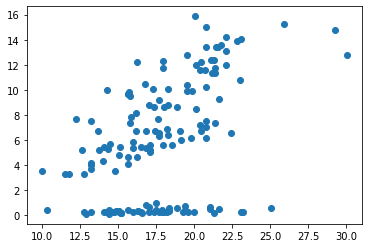

In [32]:
#mining some new features form the given data
iris_data['Sepal_fact'] = iris_data['SepalLengthCm']*iris_data['SepalWidthCm']
iris_data['petal_fact'] = iris_data['PetalLengthCm']*iris_data['PetalWidthCm']
iris_data

plt.scatter(iris_data['Sepal_fact'],iris_data['petal_fact'])
plt.show()

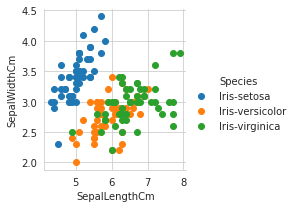

In [33]:
sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

Plotting the relationship between all the classes and it can be said that Iris-setosa are more scattered and from the other two, so need to get features such that the helps in easily classification of the iris-versicolour and iris-virginica

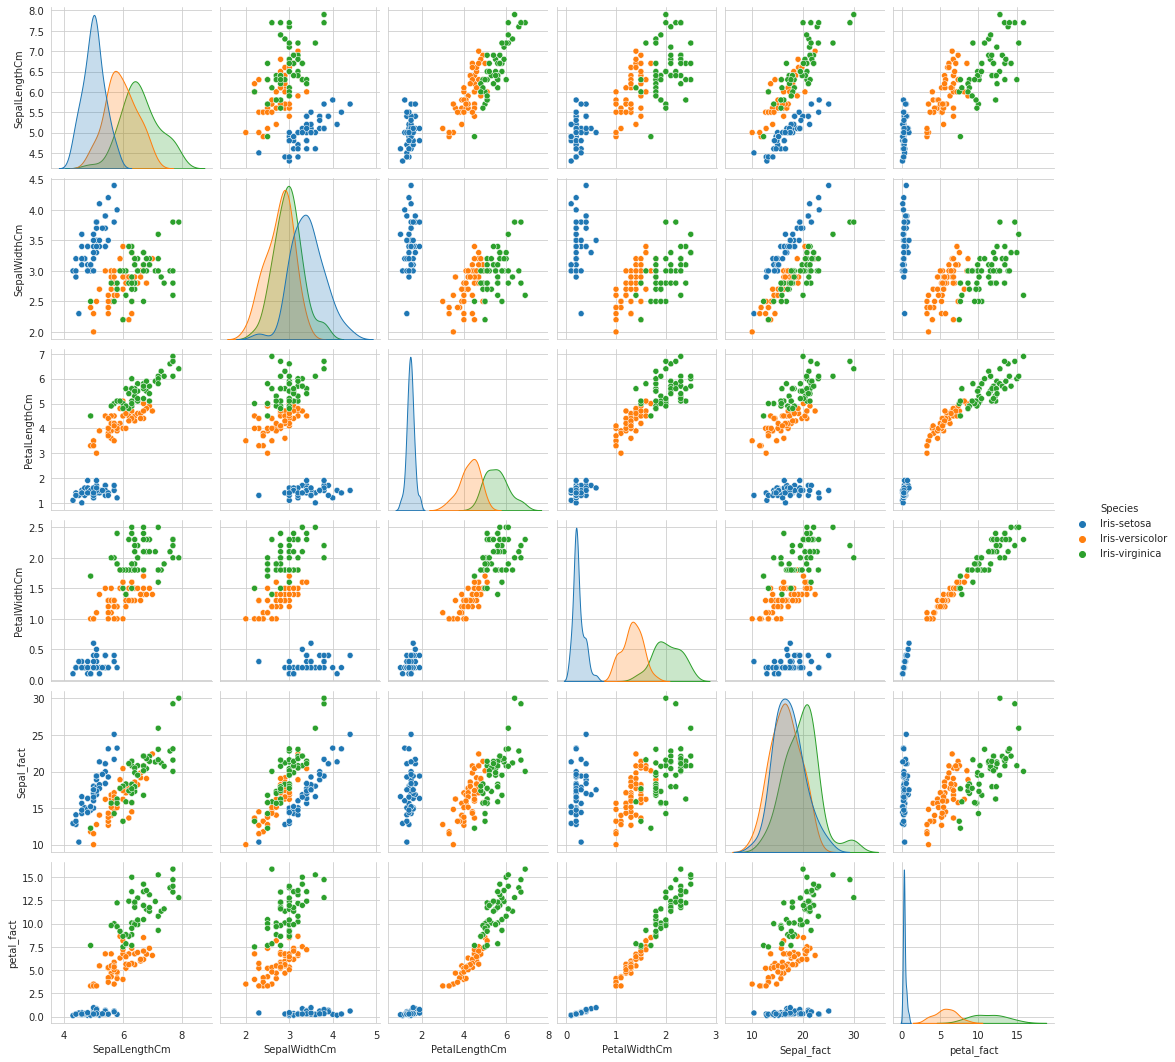

In [35]:
#Pair plot gives the relationship b/w all features distribution with each other..

sns.pairplot(iris_data.drop(['Id'],axis=1), hue='Species')
plt.show()

Since Sepal_fact is overlapping a lot with all the classes we will remove that from the features so that features do not get overlap with each other and make it more complex for the model to classify the species.Petal_fact has the smallest intersection range and we can see that in the last plot, so it is an important feature for the model.More over sepal width has also a good amount of intersection, so removing it can also help in this case.

In [ ]:
#assigning the target data to the target variable
y=iris_data.Species
#assigning the features into a list 
features = ['SepalLengthCm','PetalLengthCm','PetalWidthCm','petal_fact']
#X is the variable which contains the feature
X=iris_data[features]
X.describe()

Before selecting the features, calculate the descriptive statistics of the data to easily analyse 

In [27]:
#importing the libraries for builiding the Decision tree model
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split , cross_val_score

#Splitting the data into training and testing data
Xtrain , Xtest , ytrain , ytest = train_test_split(X,y,test_size=0.3,random_state=30)
#Splitting the data in cross validation training and testing data
Xt , Xcv , yt , ycv = train_test_split(Xtrain ,ytrain ,test_size=0.3,random_state=30)

[Text(111.60000000000001, 195.696, 'X[2] <= 0.75\ngini = 0.653\nsamples = 73\nvalue = [31, 23, 19]'),
 Text(55.800000000000004, 152.208, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(167.4, 152.208, 'X[2] <= 1.65\ngini = 0.495\nsamples = 42\nvalue = [0, 23, 19]'),
 Text(111.60000000000001, 108.72, 'gini = 0.0\nsamples = 22\nvalue = [0, 22, 0]'),
 Text(223.20000000000002, 108.72, 'X[2] <= 1.75\ngini = 0.095\nsamples = 20\nvalue = [0, 1, 19]'),
 Text(167.4, 65.232, 'X[1] <= 4.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(279.0, 65.232, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 18]')]

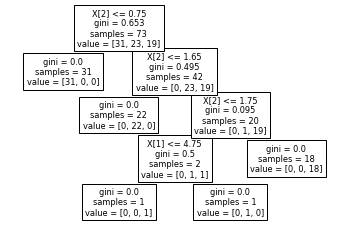

In [28]:
#Builing the DT classifier model by using the training data
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt,yt)

#Plotting the DT 
tree.plot_tree(Iris_clf)

In [29]:
#cross validation for the training data 
cross_val_score(Iris_clf,Xt,yt,cv=3,scoring='accuracy').mean()

Y_cvt = Iris_clf.predict(Xcv)

print('Accuracy score for validation test data is:',accuracy_score(ycv, Y_cvt)*100)
multilabel_confusion_matrix(ycv , Y_cvt)

Accuracy score for validation test data is: 93.75


array([[[26,  0],
        [ 0,  6]],

       [[16,  2],
        [ 0, 14]],

       [[20,  0],
        [ 2, 10]]])

[Text(111.60000000000001, 199.32, 'X[1] <= 2.6\ngini = 0.664\nsamples = 105\nvalue = [37, 37, 31]'),
 Text(55.800000000000004, 163.07999999999998, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 7.425\ngini = 0.496\nsamples = 68\nvalue = [0, 37, 31]'),
 Text(111.60000000000001, 126.83999999999999, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(223.20000000000002, 126.83999999999999, 'X[2] <= 1.75\ngini = 0.161\nsamples = 34\nvalue = [0, 3, 31]'),
 Text(167.4, 90.6, 'X[2] <= 1.55\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(111.60000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(223.20000000000002, 54.359999999999985, 'X[0] <= 5.45\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(279.0, 18.119999999999976, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(279.0, 90.6, 'gini = 0.0\nsamples = 28\nvalue = [0

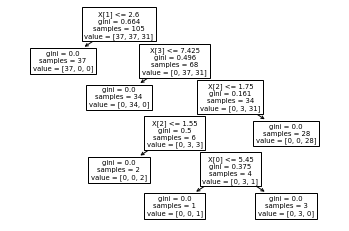

In [30]:
#Checking our model performance on actual unseen test data..
RealIris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=3)
RealIris_clf.fit(Xtrain,ytrain)

#Plotting the tree for the actual unseen data
tree.plot_tree(RealIris_clf)

In [31]:
YT_Fhat = RealIris_clf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 95.55555555555556 %


array([[[32,  0],
        [ 0, 13]],

       [[31,  1],
        [ 1, 12]],

       [[25,  1],
        [ 1, 18]]])